# Q_4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


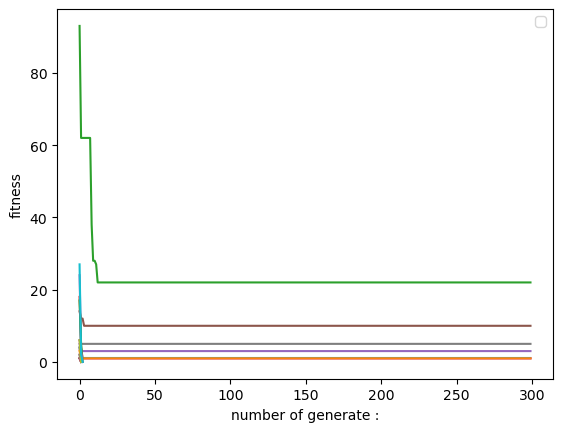

best solution : 
{'S': 9, 'E': 2, 'N': 3, 'D': 5, 'M': 1, 'O': 0, 'R': 9, 'Y': 7}
fitness : 0
 1: {'S': 9, 'E': 2, 'N': 3, 'D': 5, 'M': 1, 'O': 0, 'R': 9, 'Y': 7}, fitness : 0 
 2: {'S': 6, 'E': 5, 'N': 2, 'D': 3, 'M': 0, 'O': 7, 'R': 3, 'Y': 8}, fitness : 0 
 3: {'S': 3, 'E': 9, 'N': 3, 'D': 1, 'M': 0, 'O': 4, 'R': 8, 'Y': 8}, fitness : 22 
 4: {'S': 3, 'E': 5, 'N': 9, 'D': 1, 'M': 0, 'O': 3, 'R': 6, 'Y': 7}, fitness : 1 
 5: {'S': 2, 'E': 5, 'N': 8, 'D': 6, 'M': 0, 'O': 2, 'R': 7, 'Y': 8}, fitness : 3 
 6: {'S': 8, 'E': 5, 'N': 4, 'D': 1, 'M': 0, 'O': 9, 'R': 1, 'Y': 6}, fitness : 0 
 7: {'S': 4, 'E': 7, 'N': 2, 'D': 3, 'M': 0, 'O': 5, 'R': 5, 'Y': 9}, fitness : 1 
 8: {'S': 2, 'E': 8, 'N': 1, 'D': 9, 'M': 0, 'O': 3, 'R': 5, 'Y': 2}, fitness : 5 
 9: {'S': 3, 'E': 7, 'N': 1, 'D': 9, 'M': 0, 'O': 4, 'R': 5, 'Y': 6}, fitness : 0 
 10: {'S': 8, 'E': 7, 'N': 6, 'D': 3, 'M': 0, 'O': 9, 'R': 1, 'Y': 9}, fitness : 1 
 11: {'S': 4, 'E': 7, 'N': 2, 'D': 7, 'M': 0, 'O': 5, 'R': 4, 'Y': 4}, fit

In [5]:
import random
import matplotlib.pyplot as plt

letters = 'SENDMORY'

def to_number(mapping, word):
    return int(''.join(str(mapping[letter]) for letter in word))

def fitness(mapping):
    send = to_number(mapping, 'SEND')
    more = to_number(mapping, 'MORE')
    money = to_number(mapping, 'MONEY')
    return abs((send + more) - money)

def generate_individual():
    digits = list(range(10))
    random.shuffle(digits)
    return {letters[i]: digits[i] for i in range(len(letters))}

def mutate(individual):
    mutated = individual.copy()
    a, b = random.sample(letters, 2)
    mutated[a], mutated[b] = mutated[b], mutated[a]
    return mutated

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(letters) - 1)
    child1 = {}
    child2 = {}
    for i in range(crossover_point):
        child1[letters[i]] = parent1[letters[i]]
        child2[letters[i]] = parent2[letters[i]]
    for i in range(crossover_point, len(letters)):
        child1[letters[i]] = parent2[letters[i]]
        child2[letters[i]] = parent1[letters[i]]
    return child1, child2

def tournament_selection(population, fitnesses, tournament_size):
    selected = random.sample(list(population.keys()), tournament_size)
    best_individual = min(selected, key=lambda ind: fitnesses[ind])
    return best_individual


population_size = 500
generations = 300
tournament_size = 50
mutation_rate = 0.01
repeats = 20  

def run_evolutionary_algorithm():
    population = {i: generate_individual() for i in range(population_size)}
    fitnesses = {i: fitness(population[i]) for i in range(population_size)}
    best_individual = min(fitnesses, key=fitnesses.get)
    fitness_history = []

    for generation in range(generations):
        new_population = {}
        for i in range(population_size // 2):
            parent1 = population[tournament_selection(population, fitnesses, tournament_size)]
            parent2 = population[tournament_selection(population, fitnesses, tournament_size)]
            child1, child2 = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child1 = mutate(child1)
            if random.random() < mutation_rate:
                child2 = mutate(child2)
            new_population[2 * i] = child1
            new_population[2 * i + 1] = child2
        population = new_population
        fitnesses = {i: fitness(population[i]) for i in range(population_size)}
        best_individual = min(fitnesses, key=fitnesses.get)
        fitness_history.append(fitnesses[best_individual])
        if fitnesses[best_individual] == 0:
            break

    return population[best_individual], fitnesses[best_individual], generation, fitness_history

best_solutions = []

for i in range(repeats):
    best_solution, best_fitness, gen, fitness_history = run_evolutionary_algorithm()
    best_solutions.append((best_solution, best_fitness, gen, fitness_history))
    plt.plot(range(len(fitness_history)), fitness_history)

plt.xlabel('number of generate :')
plt.ylabel('fitness')

plt.legend()
plt.show()

overall_best_solution = min(best_solutions, key=lambda x: x[1])

print("best solution : ")
print(overall_best_solution[0])
print("fitness :", overall_best_solution[1])

for i, (solution, fitness_value, gen, _) in enumerate(best_solutions):
    print(f' {i+1}: {solution}, fitness : {fitness_value} ')
